# Lab Assignment 3

## Pranith Praveen, s2097010

We consider the system $$\frac{dx}{dt}=x(y-1),\quad \frac{dy}{dt}=4-y^2-x^2.$$

## Task 1 (2 marks)

Use `SymPy` to find the critical points of the system.

In [67]:
import sympy as sym
import numpy as np
sym.init_printing()
from IPython.display import display_latex
C1, C2, t = sym.symbols('C1, C2, t')
x = sym.Function('x')
y = sym.Function('y')
eq1 = sym.Eq(x(t).diff(t),(x(t))*(y(t)-1))
eq2 = sym.Eq(y(t).diff(t),4-x(t)**2-(y(t)**2))
[eq1, eq2]

FG = sym.Matrix([eq1.rhs, eq2.rhs])
FG

sym.solve(FG)





## Task 2 (4 marks)

Give your implementation of the `linearise` function from Lab 3.

Use this to find linear approximations of the system around the critical points with $x \geq 0$ and $y \geq 0$. Use the output to classify these critical points (use markdown cells and proper reasoning to explain the type of each critical point).

In [68]:

def get_Jacobian_critical_point(matrix,X,Y,cpx,cpy):
    '''
    returns Jacobian evaluated at the given critical point
    '''
    
    jacobian = matrix.jacobian([X,Y])
    
    return jacobian.subs({X:cpx,Y:cpy}) 

        #return matrix.jacobian([X,Y])

get_Jacobian_critical_point(FG,x(t),y(t),0,2)

def linearise(matrix , X,Y,cpx,cpy):
    
    Eigen = get_Jacobian_critical_point(matrix,X,Y,cpx,cpy).eigenvals() 
     
    print('Eigen Values are:')
    
    print(list(Eigen.keys()))
    
    return sym.Eq(sym.Matrix([X, Y]).diff(t), sym.MatMul(get_Jacobian_critical_point(matrix,X,Y,cpx,cpy), sym.Matrix([X, Y])))







In [69]:
display_latex((linearise(FG,x(t),y(t),0,2)))

Eigen Values are:
[1, -4]


We can see that the eigen Values a,b are b<0<a , because of which the critical point is a saddle 

In [70]:
display_latex((linearise(FG,x(t),y(t),np.sqrt(3),1)))


Eigen Values are:
[-1.0 - 2.23606797749979*I, -1.0 + 2.23606797749979*I]


We can see that the eigen Values a,b are complex with a negative real part , because of which the critical point is a spiral sink

## Task 3 (4 marks)

Produce a phase portrait of the system, with trajectories showing the behaviour around all the critical points. A few trajectories are enough to show this behaviour. Use properly-sized arrows to diplay the vector field (the RHS of the ODE). There are some marks allocated to the quality of your figure in this part. Try to keep it illustrative yet not too cluttered.

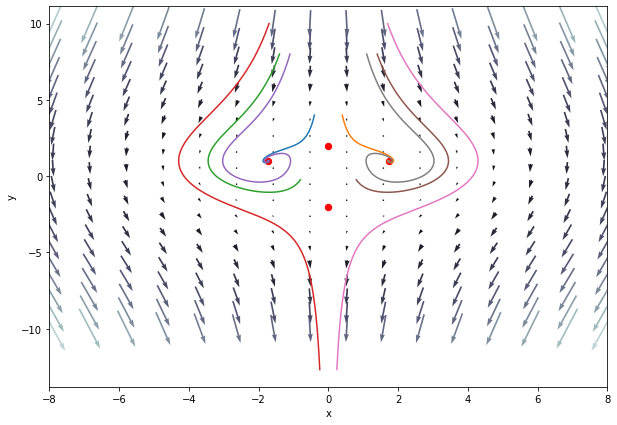

In [72]:
# Define vector field

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def vField(x,t):

    u = x[0]*(x[1]-1)
    v = 4-x[0]**2-x[1]**2
    return [u,v]

# Plot vector field
X, Y = np.mgrid[-10:10:20j,-10:10:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=2000, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
#sqrt3,1 and 0,2
ics = [[3,2],[-1.7,2],[1.7,-2],[-1.7,-2],[0,2],[0,-2],[2,2],[-2,2],[2,-2]]
durations = [0, 0.8, 5, 1.5 ,0, 0.8, 5, 1.5 ,1]


vcolors = plt.cm.autumn_r(np.linspace(-5, 5, len(ics)))  # colors for each trajectory

# plot trajectories

    
t =np.linspace(0,5,500)
x0,y0 =-0.4,4
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])

    
t =np.linspace(0,5,500)
x0,y0 =0.4,4
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])
    
t =np.linspace(0,1.3,500)
x0,y0 =-1.4,8
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])
    
t =np.linspace(0,1,500)
x0,y0 =-1.7,10
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])
    
t =np.linspace(0,5,500)
x0,y0 =-1.1,8
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])

t =np.linspace(0,1.3,500)
x0,y0 =1.4,8
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])
    
t =np.linspace(0,1,500)
x0,y0 =1.7,10
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])
    
t =np.linspace(0,5,500)
x0,y0 =1.1,8
x = odeint(vField,[x0,y0],t)
ax.plot(x[:,0], x[:,1])

cps = [[np.sqrt(3),1], [0,2],[-np.sqrt(3),1], [0,-2]]
cp_x = [cp[0] for cp in cps]
cp_y = [cp[1] for cp in cps]
ax.scatter(cp_x, cp_y, color='red', s=40)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-8,8)
#plt.legend()

plt.show()

### END SOLUTION

<div class="alert alert-danger">
    <h3>Submission instructions</h3>
    
<ul>

<li> Remember to submit <b>all</b> PDF, .py and .ipynb formats.</li>

<li> Note that if the plots are not appearing in your PDF, you should try replacing <code>%matplotlib notebook</code> with <code>%matplotlib inline</code>.</li>

<li> You should use a mix of code and markdown cells as needed, e.g. using markdown cells to write discussion points or conclusions, rather then typing these as comments within code.</li>

</ul>
    
</div>